# EDA

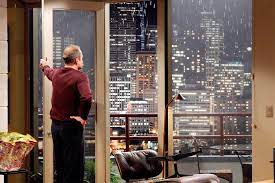

### My client is *Erin Robinson*! <br>
Miss Robinson is a buyer with a vision to improve the conditions of the socioeconomic disadvantaged in Kings County. <br>
Her aim is to:<br>
* <span style="color:black"> buy in a poorer district 
* <span style="color:black"> probably want to renovate
* <span style="color:black"> re-sell with a minimal profit!


Therefore, I will analyse my DB for:
* <span style="color:black"> zip codes, where houses are significantly cheaper compared to the average in the distance to the city center?
* <span style="color:black"> houses, which weren't renovated for a very long time and/or are in a bad (not worst) overall condition and/or have a low (not worst) overall grade? <br><span style="color:grey"> *(Because: Miss Robinson aims to renovate houses to improve the living conditions of the people in that district. <br> 
If a house in very bad conditions it is cheaper to be wrecked and rebuilt. <br>
A newly built house is to expensive for the people Miss Robinson is doing her buisness for and would either end up in loss for Miss Robinson <br>
**or** with the inlfux of socioeconomic more advantaged people displacing the more disadvantaged ones!)*
* <span style="color:black"> investigate the relative profit per region a renovation does to estimate the "minimal profit"?

## Hypotheses:	<b>
1. There are zipcodes, where the house-prices are significantly cheaper than the average house-price in Kings county. <b>
2. The cheaper the houses are in relation to the average prices in that zipcode-region, the longer they have not been renovated. <b>
3. Renovating a house increases its worth, independent of the region it is located in.

### Starting with importing needed libraries and fetching the data:

In [1]:
# importing the necessary libaries:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import psycopg2
import os
from dotenv import load_dotenv
from sqlalchemy import create_engine
import missingno as msno
import plotly.express as px

# predefined code from neue fische to alter the float format and predefine figures?
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
#read the database string from the .env:
load_dotenv() # loading of the .env file

DB_STRING = os.getenv('DB_STRING') # calling the informations from .env
stri_db = create_engine(DB_STRING) # connecting to the DB


# fetching and joining the tables:
query_string = "SET SCHEMA 'eda'; SELECT * FROM eda.king_county_house_details d LEFT JOIN king_county_house_sales s ON d.id = s.house_id;" # SQL query for join and to specify the data from the tables
db_request = pd.read_sql(query_string, stri_db) # fetching the data and assigning a variable for the fetched dataframe 
#db_request.to_csv('eda_project_MergedData.csv',index=False) # possibility to save the cleaned dataframe for easier access in the future

### Exploring the data:

In [3]:
db_request.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520,1
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192,2
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,5631500400,3
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2487200875,4
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,1954400510,5


In [4]:
db_request.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_id,id
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,...,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,...,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,540296.574,4580474287.771,10799.000
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,...,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,367368.140,2876735715.748,6234.661
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,...,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,78000.000,1000102.000,1.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,...,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,322000.000,2123049175.000,5400.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,...,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,450000.000,3904930410.000,10799.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,...,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,645000.000,7308900490.000,16198.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,...,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000,9900000190.000,21597.000


In [5]:
db_request.columns

Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'house_id', 'id'],
      dtype='object')

In [6]:
# checking data types
db_request.dtypes

id                 int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above       float64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
date              object
price            float64
house_id           int64
id                 int64
dtype: object

<Axes: >

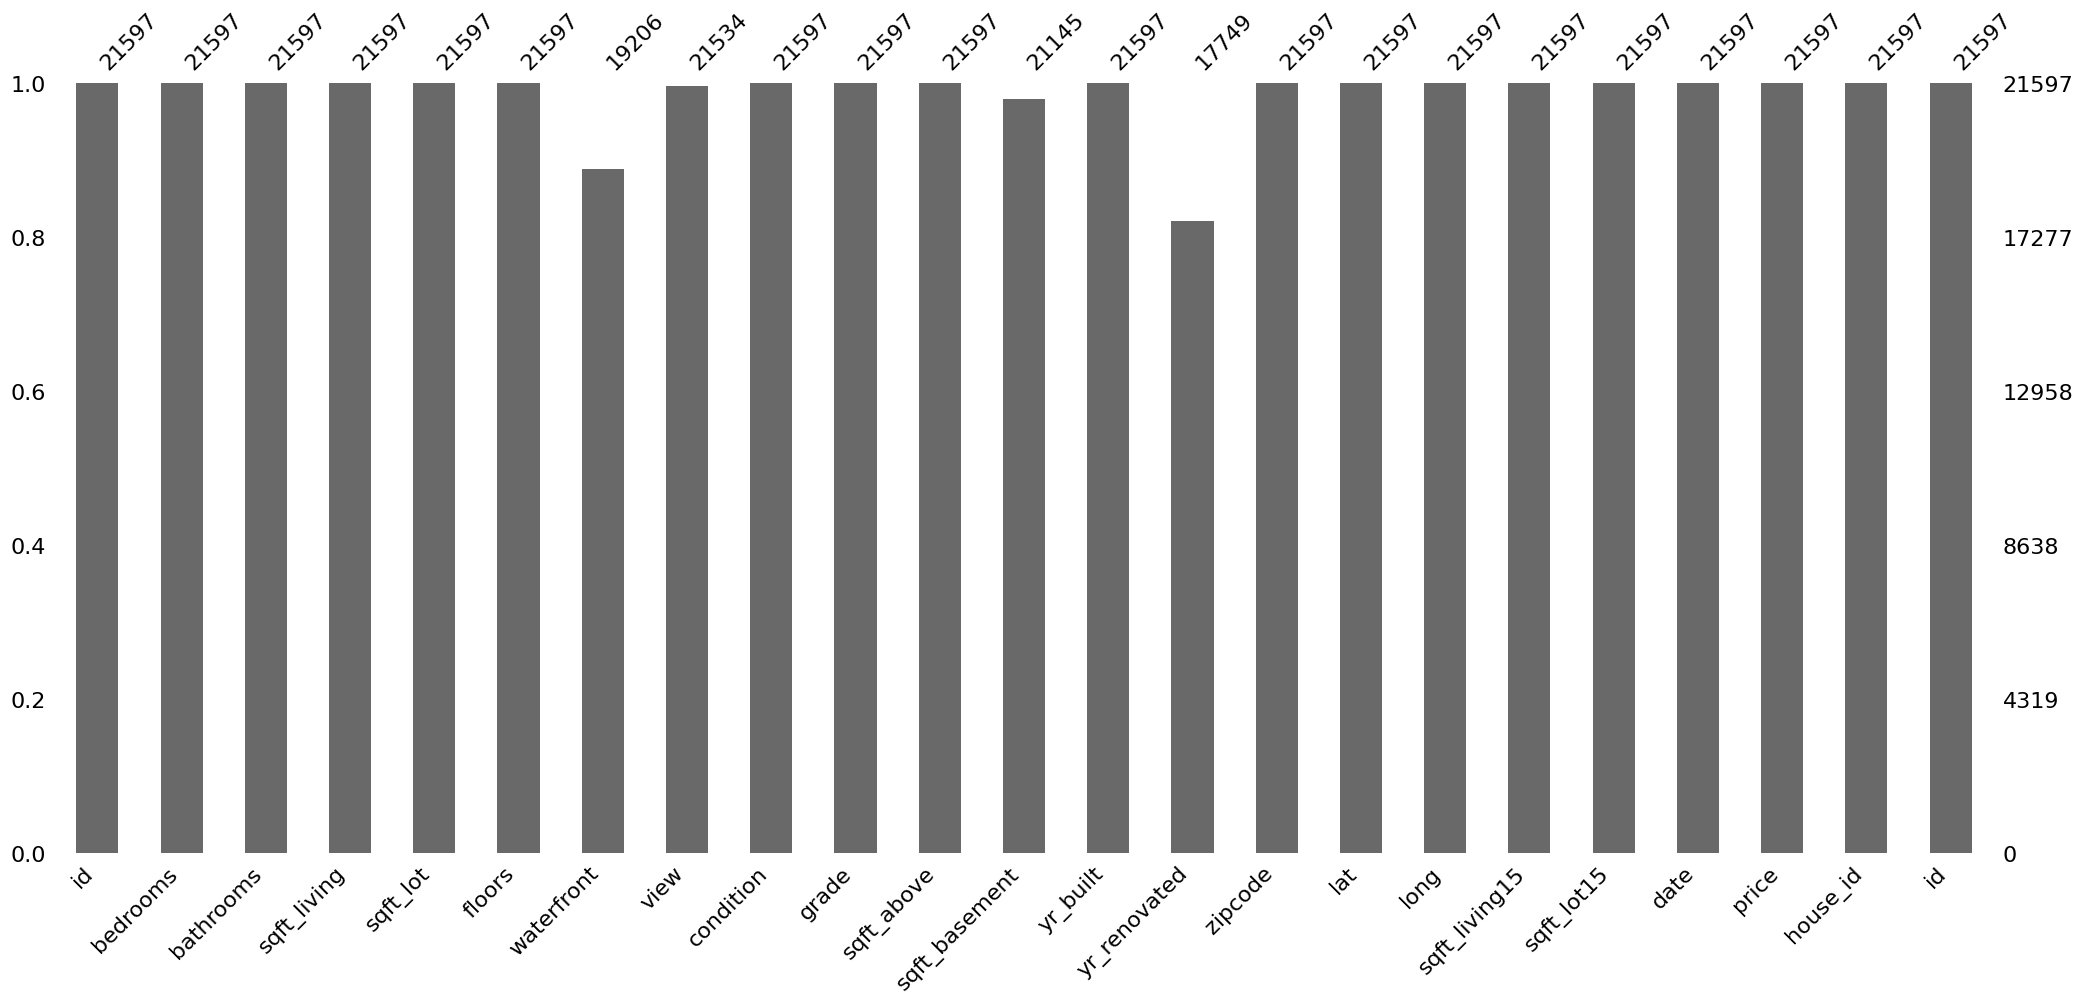

In [7]:
# checking for missing data using missingno:
msno.bar(db_request)

In [8]:
# check how many duplicated rows exist in the data set - in particular for the 
# house_ids as one house might be sold multiple times

db_request[['house_id', 'price']].duplicated().value_counts()

grp_trades_df = db_request.groupby(['house_id','price'])['date'].count().reset_index(name='trades_count')
multi_trades = grp_trades_df[grp_trades_df['trades_count'] > 1]
multi_trades
# no real duplicates as the duplicated house_ids do not have the same date of sale or price, 
# which means: they just have been sold multiple times


,house_id,price,trades_count
4580,1825069031,550000.000,2
14389,6308000010,585000.000,2
18940,8648900110,555000.000,2


### Start of data cleaning

In [9]:
#droping unnecessary or doubled columns, column "id" is in multiple times and identical with "house_id"
db_request.drop('id', axis=1, inplace=True)

In [10]:
# headers are formated as needed


In [11]:
# change date to timestamp
db_request['date'] = pd.to_datetime(db_request['date'], format='%Y/%m/%d')
type(db_request['date'][0])
db_request['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [12]:
# fill na in view
view_imput = int(db_request['view'].mean())

In [13]:
db_request.fillna({'view': view_imput}, inplace=True)

In [14]:
db_request['view'].isna().sum()

np.int64(0)

In [15]:
# bedrooms zu int
db_request = db_request.astype({'bedrooms': int})

# view  zu int
db_request = db_request.astype({'view': int})

# prices to integer, as decimal digits are bad for the plots
db_request = db_request.astype({'price': int})

In [16]:
# dealing with na in renovation year
db_request["yr_renovated"] = (db_request["yr_renovated"]) / 10.0
db_request.loc[(db_request.yr_renovated == 0), 'yr_renovated'] = np.nan
db_request['yr_renovated'] = db_request['yr_renovated'].astype(pd.Int64Dtype())

db_request['yr_renovated'].isna().sum()

np.int64(20853)

In [17]:
# waterfront 1 zu true und 0 zu false, also I wont need this column
db_request['waterfront'].fillna(0, inplace=True)
db_request['waterfront'] = db_request['waterfront'].map({1: True, 0: False})
db_request['waterfront'].head()


0    False
1    False
2    False
3    False
4    False
Name: waterfront, dtype: bool

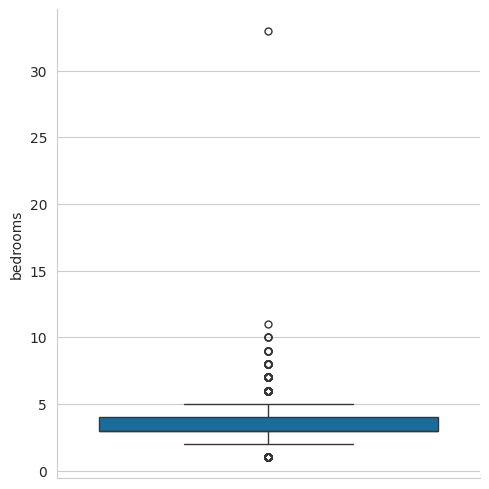

In [18]:
# creating boxplots and scatterplotts to identify outliners in some columns

sns.set_style("whitegrid")

sns.catplot(
    data=db_request,y='bedrooms',
    kind='box', 
    palette="colorblind")

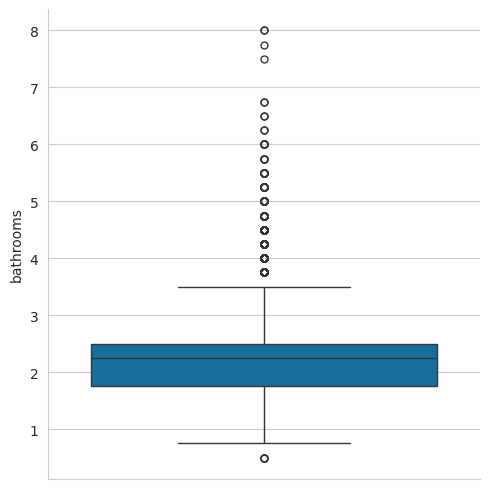

In [19]:
sns.catplot(
    data=db_request,y='bathrooms',
    kind='box', 
    palette="colorblind")

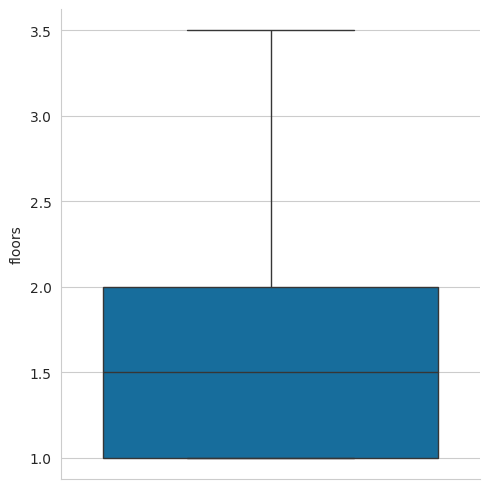

In [20]:
sns.catplot(
    data=db_request,y='floors',
    kind='box', 
    palette="colorblind")

<Axes: xlabel='bedrooms', ylabel='price'>

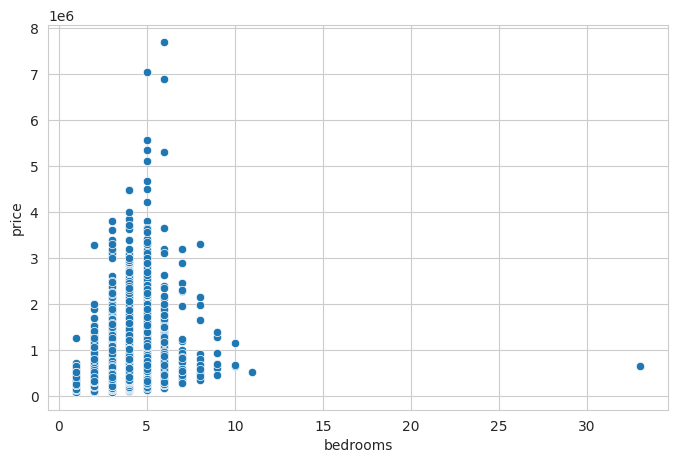

In [ ]:
#this here aint necessary but I wanted to see something that most likely comes with a correlation...except of the outliner
sns.scatterplot(data=db_request, x='bedrooms', y='price')

In [22]:
# Testing provided plots


fig = px.scatter_mapbox(db_request,
                           lat=db_request.lat,
                           lon=db_request.long,
                           color='condition',
                           title='Houses by condition',
                           mapbox_style='open-street-map',
                           center={"lat": db_request['lat'].mean(), "lon": db_request['long'].mean()}
                     )
fig.show()


### Starting with analysis:

1. There are zipcodes, where the house-prices are significantly cheaper than the average house-price in Kings county. <b>

In [23]:
# how many unique zipcodes to we have?
db_request.zipcode.nunique()

70

In [24]:
# what is the average house price in Kings County:
KC_mean_price = db_request.price.mean()

In [25]:
# How many zipcodes have houses that cost less than the average house price?
db_request[db_request['price'] < db_request.price.mean()]['zipcode'].nunique()

69

In [26]:
# here I group the houses based on their zipcodes, the define the average price for a house per zipcode
grp_zip = db_request.groupby('zipcode')
grp_zip_mean = db_request.groupby('zipcode').mean('price').reset_index()

# Now I create a DF of those zipcodes, having a lower average house price than the average of whole Kings County
poorer_zip = grp_zip_mean[grp_zip_mean['price'] < KC_mean_price]

poorer_zip['zipcode'].count() # to see how many zip codes have an average price below the overall average price

np.int64(38)

In [27]:
# Start plotting this on a map:
fig_belowAvgPrice_map = px.choropleth_mapbox(poorer_zip,
                           locations='zipcode',
                           geojson='https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json',
                           color='price',
                           featureidkey='properties.ZCTA5CE10',
                           title='Neighborhoods with average house prices below the total house-price average in Kings County',
                           mapbox_style='open-street-map', zoom=8,
                           color_continuous_scale=px.colors.cyclical.IceFire, 
                           width=900,  # Set the width of the plot
                           height=900,   # Set the height of the plot
                           center={"lat": poorer_zip['lat'].mean(), "lon": poorer_zip['long'].mean()}
                     )

# adding map-plot with the all zip codes to see the difference:
figCondition = px.choropleth_mapbox(db_request,
                           locations='zipcode',
                           geojson='https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json',
                           color='condition',
                           featureidkey='properties.ZCTA5CE10',
                           title='Houses by condition',
                           mapbox_style='open-street-map',
                           center={"lat": db_request['lat'].mean(), "lon": db_request['long'].mean()}
                     )

figPrice = px.choropleth_mapbox(db_request,
                           locations='zipcode',
                           geojson='https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json',
                           color='price',
                           featureidkey='properties.ZCTA5CE10',
                           title='Houses by price',
                           mapbox_style='open-street-map',
                           center={"lat": db_request['lat'].mean(), "lon": db_request['long'].mean()}
                     )

fig_belowAvgPrice_map.show()#, figCondition.show(), figPrice.show()

More than half of the zipcodes have an average house price below the the overall K.C. average house price...


...and not more than half of Seattle is considered poor! 

Currently (2025), Seattle has a poverty rate of ~10%, so I will adjust my approach to the lowest 15%:


In [84]:
# adjusting the deciles
prices_d1 = db_request.price.quantile(0.15)
grp_zip_d1 = grp_zip_mean[grp_zip_mean['price'] < prices_d1]

In [89]:

fig_q1 = px.choropleth_mapbox(grp_zip_d1,
                           locations='zipcode',
                           geojson='https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json',
                           color='price',
                           featureidkey='properties.ZCTA5CE10',
                           title='Zipcodes with an average house price in the lowest 15%',
                           mapbox_style='open-street-map',zoom=8,
                           color_continuous_scale=px.colors.cyclical.IceFire, 
                           width=900,  # Set the width of the plot
                           height=900,   # Set the height of the plot
                           center={"lat": grp_zip_d1['lat'].mean(), "lon": grp_zip_d1['long'].mean()}
                     )

figCondition = px.choropleth_mapbox(db_request,
                           locations='zipcode',
                           geojson='https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json',
                           color='condition',
                           featureidkey='properties.ZCTA5CE10',
                           title='Houses by condition',
                           mapbox_style='open-street-map',
                           center={"lat": db_request['lat'].mean(), "lon": db_request['long'].mean()}
                     )

figPrice = px.choropleth_mapbox(db_request,
                           locations='zipcode',
                           geojson='https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json',
                           color='price',
                           featureidkey='properties.ZCTA5CE10',
                           title='Houses by price',
                           mapbox_style='open-street-map',
                           center={"lat": db_request['lat'].mean(), "lon": db_request['long'].mean()}
                     )

fig_q1.show()#, figCondition.show(), figPrice.show()

In [90]:
# zipcodes and total house prices are cool but with this approach we exclude the size of the house.
# so now I will calculate the average sqft price per zip code
# I will start by creating two new columns, that calculates the average sqft price of the living and the lot per house

db_request.eval('sqft_living_price = price/sqft_living', inplace = True)
db_request.eval('sqft_lot_price = price/sqft_lot', inplace = True)
db_request.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,...,long,sqft_living15,sqft_lot15,date,price,house_id,sqft_living_price,sqft_lot_price,total_sqft_price,renovated
0,3,1.000,1180.000,5650.000,1.000,False,0,3,7,1180.000,...,-122.257,1340.000,5650.000,2014-10-13,221900,7129300520,188.051,39.274,32.489,False
1,3,2.250,2570.000,7242.000,2.000,False,0,3,7,2170.000,...,-122.319,1690.000,7639.000,2014-12-09,538000,6414100192,209.339,74.289,54.831,True
2,2,1.000,770.000,10000.000,1.000,False,0,3,6,770.000,...,-122.233,2720.000,8062.000,2015-02-25,180000,5631500400,233.766,18.000,16.713,False
3,4,3.000,1960.000,5000.000,1.000,False,0,5,7,1050.000,...,-122.393,1360.000,5000.000,2014-12-09,604000,2487200875,308.163,120.800,86.782,False
4,3,2.000,1680.000,8080.000,1.000,False,0,3,8,1680.000,...,-122.045,1800.000,7503.000,2015-02-18,510000,1954400510,303.571,63.119,52.254,False


In [104]:
# here I calculate the average sqft price of the lot and living per zipcode:
grp_zip_mean_sq = db_request.groupby('zipcode').mean('sqft_living_price').reset_index()
grp_zip_mean_sqlot = db_request.groupby('zipcode').mean('sqft_lot_price').reset_index()

#now I calculate the zipcodes in the lowest decile of living and lot:
sq_liv_price_d1 = db_request.sqft_living_price.quantile(0.15)
grp_zip_sq_liv_price_d1 = grp_zip_mean_sq[grp_zip_mean_sq['sqft_living_price'] <= sq_liv_price_d1]

sq_lot_price_d1 = db_request.sqft_lot_price.quantile(0.15)
grp_zip_sq_lot_price_d1 = grp_zip_mean_sqlot[grp_zip_mean_sqlot['sqft_lot_price'] <= sq_lot_price_d1]

grp_zip_sq_liv_price_d1

,zipcode,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,price,house_id,sqft_living_price,sqft_lot_price,total_sqft_price,renovated
0,98001,3.393,2.012,1903.784,14967.003,1.431,0.000,0.094,3.335,7.296,...,47.309,-122.271,1830.100,11218.875,281194.870,4651273623.072,151.348,30.872,24.090,0.011
1,98002,3.327,1.839,1627.744,7517.633,1.334,0.000,0.010,3.744,6.693,...,47.309,-122.213,1479.030,7585.482,234284.035,4850894131.724,151.174,37.269,28.498,0.025
2,98003,3.357,2.047,1928.882,10603.096,1.311,0.000,0.214,3.371,7.543,...,47.316,-122.310,1876.196,9746.179,294111.279,4674181960.679,157.113,33.017,26.225,0.007
13,98023,3.425,2.062,1989.729,10470.208,1.324,0.006,0.118,3.387,7.575,...,47.309,-122.364,1963.731,9735.405,286742.812,5496059997.018,148.922,31.989,25.545,0.010
18,98030,3.500,2.162,1962.500,11778.734,1.504,0.000,0.023,3.289,7.414,...,47.369,-122.190,1919.422,8576.906,296187.980,4360348932.059,155.156,37.868,29.174,0.004
20,98032,3.392,1.708,1738.048,10379.760,1.220,0.000,0.080,3.632,7.144,...,47.374,-122.279,1668.632,9271.928,251296.240,4548920835.152,154.220,28.273,23.240,0.016
40,98092,3.501,2.240,2195.661,32494.638,1.604,0.000,0.137,3.319,7.852,...,47.302,-122.168,2130.023,30211.031,334921.063,3864029782.182,155.814,34.916,26.181,0.014


In [105]:
# plotting of the d1-sqft-living zipcodes:
fig_sqft_liv_d1 = px.choropleth_mapbox(grp_zip_sq_liv_price_d1,
                           locations='zipcode',
                           geojson='https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json',
                           color='sqft_living_price',
                           featureidkey='properties.ZCTA5CE10',
                           title='Zipcodes with an average price per squarefeet of the living space in the first quantile',
                           mapbox_style='open-street-map',zoom=8,
                           color_continuous_scale=px.colors.cyclical.IceFire, 
                           width=900,  # Set the width of the plot
                           height=900,   # Set the height of the plot
                           center={"lat": grp_zip_sq_liv_price_d1['lat'].mean(), "lon": grp_zip_sq_liv_price_d1['long'].mean()}
                     )


fig_sqft_liv_d1.show()

In [106]:
fig_sqft_lot_q1 = px.choropleth_mapbox(grp_zip_sq_lot_price_d1,
                           locations='zipcode',
                           geojson='https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json',
                           color='sqft_lot_price',
                           featureidkey='properties.ZCTA5CE10',
                           title='Zipcodes with an average price per squarefeet of the lot in the first quantile',
                           mapbox_style='open-street-map',zoom=8,
                           color_continuous_scale=px.colors.cyclical.IceFire, 
                           width=950,  # Set the width of the plot
                           height=950,   # Set the height of the plot
                           center={"lat": grp_zip_sq_lot_price_d1['lat'].mean(), "lon": grp_zip_sq_lot_price_d1['long'].mean()}
                     )


fig_sqft_lot_q1.show()#, fig_sqft_liv_q1.show()

nice, but the results are very different. In the countryside, the lots are larger which means, overall the prices per sqft of the lot are clearly lower. 

So to be preciser, both sqft-living and -lot should be merged. Further, when we have a poverty rate of ~10% we should rather use the lowest decile:

In [169]:
# as before, creating a new column, grouping the new values and then creating the average per zipcode:
db_request.eval('total_sqft_price = price/(sqft_living + sqft_lot)', inplace = True)

grp_zip_mean_totalsqprice = db_request.groupby('zipcode').mean('total_sqft_price').reset_index()

total_sqft_price_d1 = db_request.total_sqft_price.quantile(0.1) #using the lowest decile
grp_zip_total_sqft_price_d1 = grp_zip_mean_totalsqprice[grp_zip_mean_totalsqprice['total_sqft_price'] < total_sqft_price_d1]
total_sqft_price_d1 

np.float64(17.268340726973463)

In [170]:
fig_total_sqftprices_d1 = px.choropleth_mapbox(grp_zip_total_sqft_price_d1,
                           locations='zipcode',
                           geojson='https://raw.githubusercontent.com/OpenDataDE/State-zip-code-GeoJSON/master/wa_washington_zip_codes_geo.min.json',
                           color='total_sqft_price',
                           featureidkey='properties.ZCTA5CE10',
                           title='Zipcodes with an average price per total-squarefeet in the lowest 15%',
                           mapbox_style='open-street-map',zoom=8,
                           color_continuous_scale=px.colors.cyclical.IceFire, 
                           width=900,  # Set the width of the plot
                           height=900,   # Set the height of the plot
                           center={"lat": grp_zip_total_sqft_price_d1['lat'].mean(), "lon": grp_zip_total_sqft_price_d1['long'].mean()}
                     )

fig_total_sqftprices_d1.show()

With these insight I can now define the 3 zipcodes with the lowest total-sqft price and our definition of the poorest neighborhoods!

#### *(I know, that this approach is not really giving us the socioeconomically most disadvantaged regions as the sqft of the lot is actually pushing the price, however, for now I will continue with this definition/assumption)* 

In [113]:
#defining the neighborhoods as poor and check if it is really only these 3:

poor_neighborhood = grp_zip_total_sqft_price_d1
table_poor_zip = poor_neighborhood[['zipcode','total_sqft_price']].sort_values(by='total_sqft_price')
poor_neighborhood.head()



,zipcode,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,price,house_id,sqft_living_price,sqft_lot_price,total_sqft_price,renovated
10,98014,3.000,2.048,2117.968,96902.863,1.504,0.000,0.185,3.153,7.387,...,47.671,-121.849,1929.016,77979.621,455617.113,4240655613.492,223.085,17.775,15.523,0.016
14,98024,3.337,2.191,2363.062,102735.438,1.425,0.000,0.237,3.263,7.612,...,47.559,-121.905,2134.575,79484.363,586120.875,2802980843.950,252.328,17.067,14.732,0.050
35,98070,2.778,1.910,1893.060,96269.957,1.410,0.171,1.094,3.692,7.282,...,47.417,-122.464,1775.726,80068.214,489382.017,3267469353.906,277.850,15.197,13.679,0.060


In [ ]:
# I will need the houses with these zipcodes later again, therefore I create a new df with them:

#poor_zip = [poor_neighborhood['zipcode']]
#zip_poor = db_request[db_request['zipcode'].isin(any(poor_zip))]

# as the step before did not work...here I pool them by hand:
zip_98014 = db_request[db_request['zipcode'] == 98014]
zip_98024 = db_request[db_request['zipcode'] == 98024]
zip_98070 = db_request[db_request['zipcode'] == 98070]

#creating the new df:
df_poor = pd.concat([zip_98014,zip_98024, zip_98070], axis=0, ignore_index=True)


2. Hypothesis: The cheaper the houses are in relation to the average prices in that zipcode-region, the longer they have not been renovated. <b>


In [ ]:
# Are there renovated houses in the 3 defined poor neighborhoods?
# To test that, I make the lists a set and look for intersections:

db_request.query('yr_renovated > 1920')[['zipcode','yr_renovated']]

set_poor_zip = set(poor_neighborhood['zipcode'])
set_renovated_zip = set(db_request.query('yr_renovated > 1920')['zipcode'].unique())

set_poor_zip.intersection(set_renovated_zip)


{98014, 98024, 98070}

In [125]:
# adding a column with boolean for renovation. Have they ever been renovated? True False?
db_request.eval('renovated = yr_renovated', inplace = True) #creating a new column with values from "yr_renovated"
db_request['renovated'].fillna(0, inplace=True) # filling <NA> with 0 
db_request['renovated'] = db_request['yr_renovated'].ne(0) # fancy pandas function adding a True in the new 'renovated' column if the value in 'yr_renovated' is NOT '0'!
db_request['renovated'].fillna(False, inplace=True) # thanks to the ne-function I can now fill the remaining '0' with False

# calling the column-type and unique entries of 'renovated' to proof if everything worked as needed:
db_request['renovated'].dtype,db_request.renovated.unique()

(BooleanDtype,
 <BooleanArray>
 [False, True]
 Length: 2, dtype: boolean)

In [128]:
# is there a correlation between the year of renovation and the total-sqft price?
corr_price_renov_poor = df_poor['yr_renovated'].corr(df_poor['total_sqft_price'])
print('The correlation between the price and the year of renovation is', corr_price_renov_poor)

The correlation between the price and the year of renovation is 0.20276803189373552


A total of 13 houses have been renovated in the poor neighborhoods 
and the correlation between the price and the year of renovation is 0.20276803189373552 :


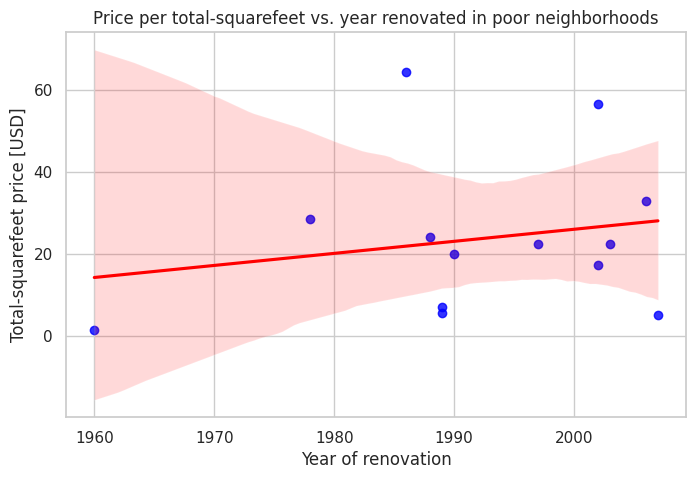

In [146]:
#now lets plot if there is a correlation between the yr_renovated and the price per t.-sqft. Are later renovations elevating the house prices?

fig_sqprice_yr_renovated_scatter = (sns.regplot(data=df_poor, x='yr_renovated', y='total_sqft_price',
                                    scatter_kws = {"color": "blue", "alpha": 0.8},
                                    line_kws = {"color": "red"}, ci=98),
        plt.title("Price per total-squarefeet vs. year renovated in poor neighborhoods"),
        plt.xlabel('Year of renovation'),
        plt.ylabel('Total-squarefeet price [USD]'))

count_renov = df_poor[df_poor['renovated'] == True]['renovated'].count() # counting the amount of renovated houses in the 3 poor zipcodes

plt.savefig("fig_sqprice_yr_renovated_scatter", dpi=300) # safing the figure

print('A total of',count_renov,'houses have been renovated in the poor neighborhoods \n'
'and the correlation between the price and the year of renovation is', corr_price_renov_poor,':')

<Axes: xlabel='renovated', ylabel='total_sqft_price'>

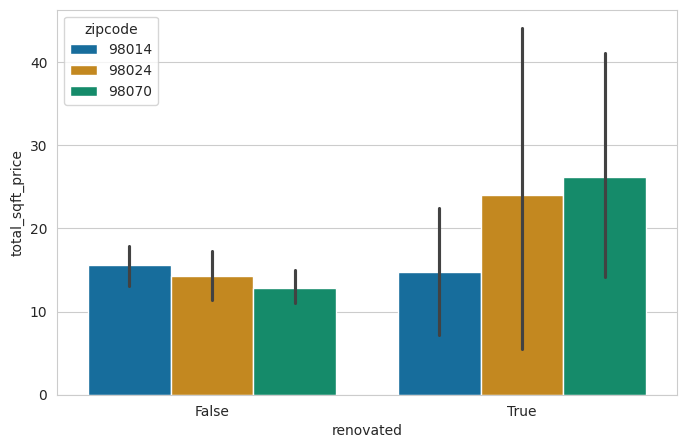

In [ ]:
# but, have renovated houses in these region a higher t.-sqft price than unrenovated?
sns.barplot(data=df_poor, x='renovated', y='total_sqft_price', hue='zipcode', palette='colorblind', ci=95)

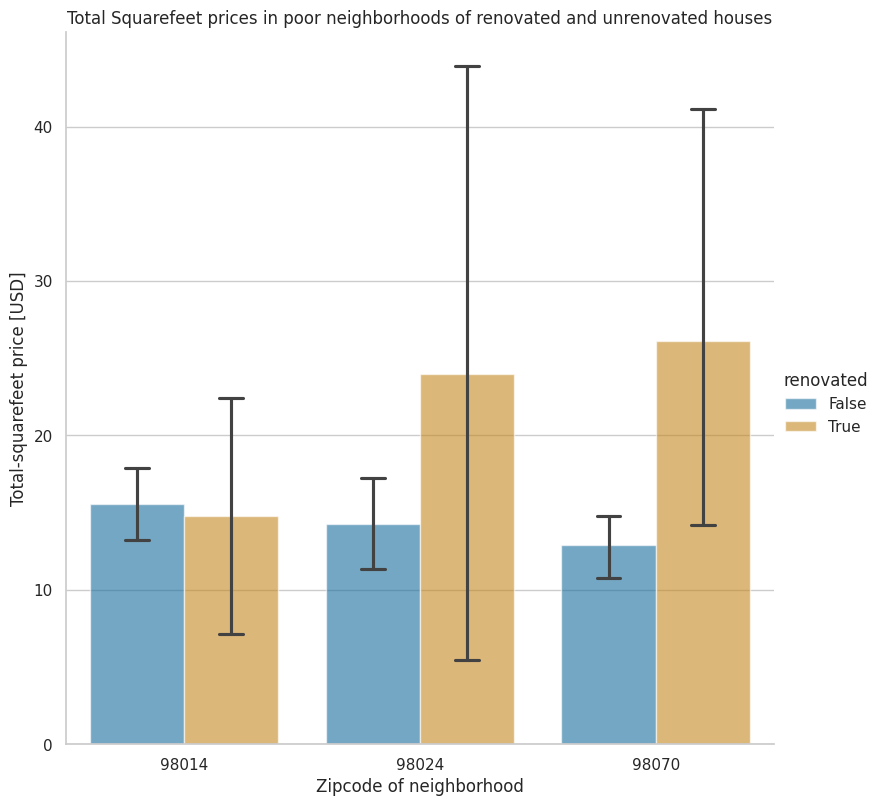

In [145]:
# same question, different fokus in the plot. Now I directly compare renovated vs. unrenovated in the zipcodes:
fig_sqprice_renovated_bar = (sns.catplot(
                            data=df_poor, kind="bar",
                            x="zipcode", y="total_sqft_price", hue="renovated",
                            errorbar=('ci', 95), palette="colorblind", alpha=.6, height=8, capsize=.2), 
        plt.title("Total Squarefeet prices in poor neighborhoods of renovated and unrenovated houses"),
        plt.xlabel('Zipcode of neighborhood'),
        plt.ylabel('Total-squarefeet price [USD]'))

plt.savefig("fig_sqprice_renovated_bar", dpi=300)


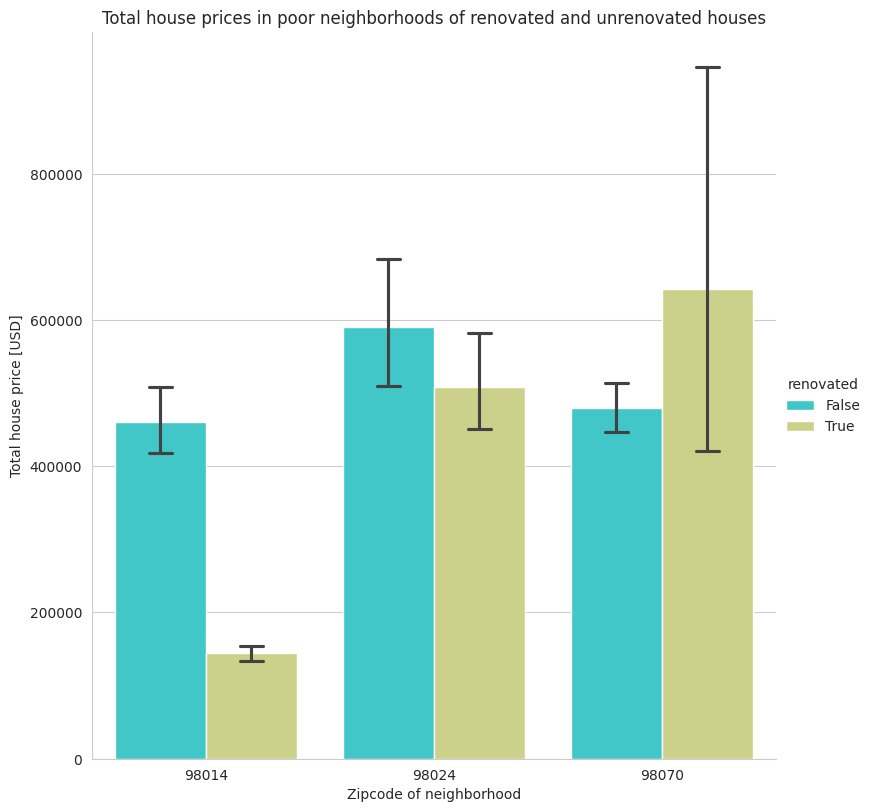

In [ ]:
# Are the results similar, if we look at the total house prices?
fig_price_renovated_bar =   (sns.catplot(
                            data=df_poor, kind="bar",
                            x="zipcode", y="price", hue="renovated",
                            errorbar=('ci', 95), palette="rainbow", alpha=1, height=8, capsize=.2), 
        plt.title("Total house prices in poor neighborhoods of renovated and unrenovated houses"),
        plt.xlabel('Zipcode of neighborhood'),
        plt.ylabel('Total house price [USD]'))



3. Renovating a house increases its worth, independent of the region it is located in.<b>


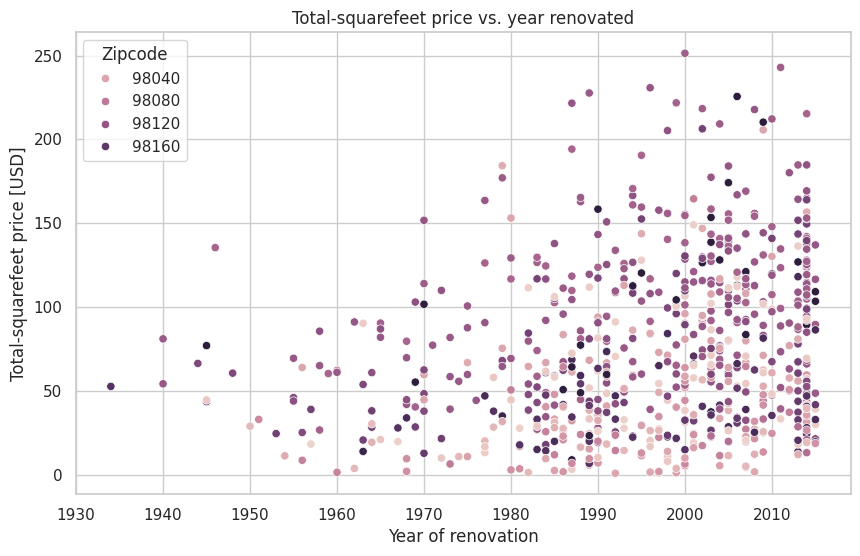

The correlation is 0.23343965613919776


(None, None)

In [137]:
#create a scatter plot demonstrating the prices vs. the year renovated:

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6)) 

sns.scatterplot(data=db_request, x='yr_renovated', y='total_sqft_price', hue="zipcode")

# Esthetics of the Plots:
plt.title("Total-squarefeet price vs. year renovated")
plt.xlabel('Year of renovation')
plt.ylabel('Total-squarefeet price [USD]')
plt.legend(title="Zipcode")  # Legende für die Farben einfügen

corr_price_renov = db_request['yr_renovated'].corr(db_request['total_sqft_price'])
plt.show(), print('The correlation is', corr_price_renov)



The correlation is 0.23343965613919776


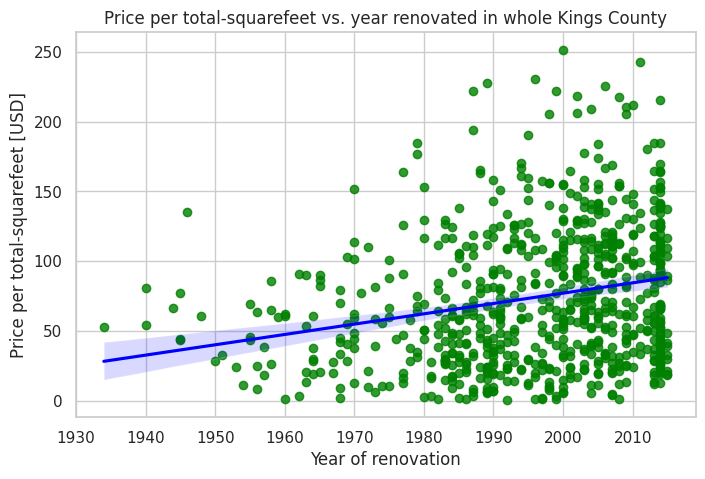

In [ ]:
# now with the regressionline:
sns.regplot(data=db_request, x='yr_renovated', y='total_sqft_price',
            scatter_kws = {"color": "green", "alpha": 0.8},
            line_kws = {"color": "blue"}, ci=98)
plt.title("Price per total-squarefeet vs. year renovated in whole Kings County")
plt.xlabel('Year of renovation'),
plt.ylabel('Total-squarefeet price [USD]')
print('The correlation is', corr_price_renov)

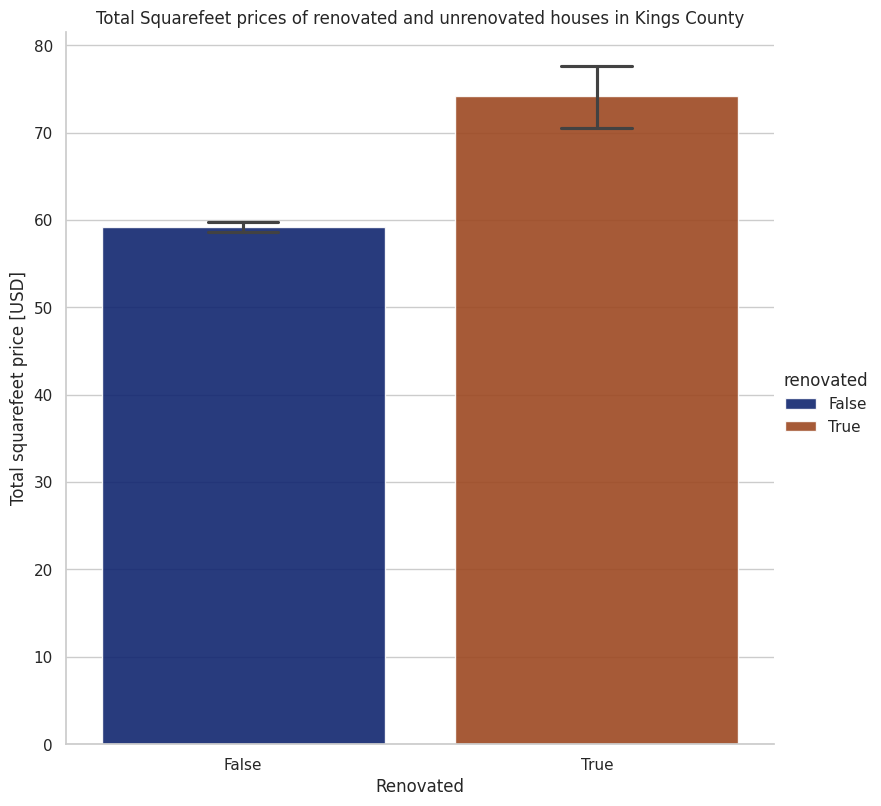

In [ ]:
# demonstrating the t.-sqft prices of unrenovated vs. renovated houses in a barplot:
fig_sqprice_renovated_bar = (sns.catplot(
    data=db_request, kind="bar",
    x="renovated", y="total_sqft_price", hue="renovated",
    errorbar=('ci', 95), palette="dark", alpha=.9, height=8, capsize=.2), 
plt.title("Total Squarefeet prices of renovated and unrenovated houses in Kings County"),
plt.xlabel('Renovated'),
plt.ylabel('Total-squarefeet price [USD]'))

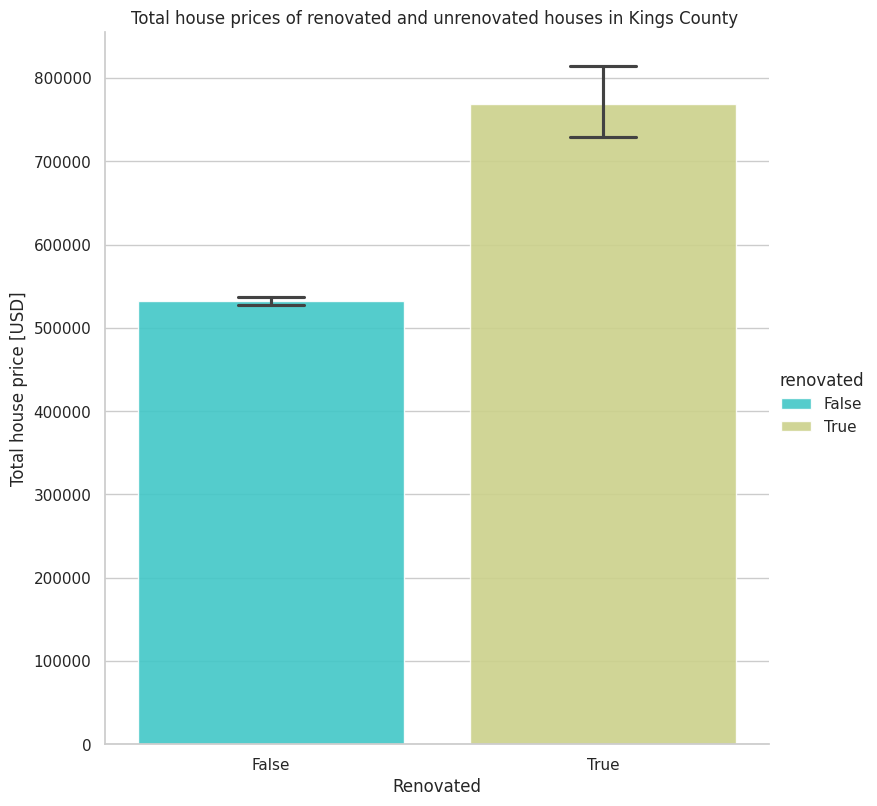

In [143]:
# demonstrating the total house prices of unrenovated vs. renovated houses in a barplot:
fig_sqprice_renovated_bar = (sns.catplot(
    data=db_request, kind="bar",
    x="renovated", y="price", hue="renovated",
    errorbar=('ci', 95), palette="rainbow", alpha=.9, height=8, capsize=.2), 
plt.title("Total house prices of renovated and unrenovated houses in Kings County "),
plt.xlabel('Renovated'),
plt.ylabel('Total house price [USD]'))

## Coming to an end:

Therefore, I will analyse my DB for:
* <span style="color:black"> zip codes, where houses are significantly cheaper compared to the average in the distance to the city center?
* <span style="color:black"> houses, which weren't renovated for a very long time and/or are in a bad (not worst) overall condition and/or have a low (not worst) overall grade? <br>
* <span style="color:black"> investigate the relative profit per region a renovation does to estimate the "minimal profit"?

In [171]:
#renovating multiple rooms, in particular kitchens brings the most profit, followed from bathroom Remodels and roof repairs
total_sqft_price_d1 = db_request.total_sqft_price.quantile(0.1)
prefinal_recom = df_poor[(df_poor['total_sqft_price']<=total_sqft_price_d1)
                      & (df_poor['yr_renovated'].isna()) 
                      & (df_poor['condition']==3)
                      & (df_poor['grade']<=6) 
                      & (df_poor['bedrooms']>=3)
                      &(df_poor['bathrooms']<df_poor['bedrooms'])][['house_id','zipcode','bedrooms','bathrooms','yr_renovated', 'price']]

prefinal_recom

,house_id,zipcode,bedrooms,bathrooms,yr_renovated,price
34,8656800190,98014,3,1.750,<NA>,280000
45,8656300385,98014,3,1.000,<NA>,305000
98,3426079024,98014,3,1.000,<NA>,150000
155,1624079088,98024,3,2.750,<NA>,415000
156,1524079088,98024,3,1.500,<NA>,275000


# Final recommendations:


In [174]:
final_recom = df_poor[(df_poor['total_sqft_price']<=total_sqft_price_d1)
                      & (df_poor['yr_renovated'].isna()) 
                      & (df_poor['condition']==3)
                      & (df_poor['grade']<=6) 
                      & (df_poor['bedrooms']>=3)
                      & (df_poor['price']<=300000)
                      &(df_poor['bathrooms']<df_poor['bedrooms'])][['house_id','zipcode','bedrooms','bathrooms','yr_renovated', 'price']]

final_plot = df_poor[(df_poor['total_sqft_price']<=total_sqft_price_d1)
                      & (df_poor['yr_renovated'].isna()) 
                      & (df_poor['condition']==3)
                      & (df_poor['grade']<=6) 
                      & (df_poor['bedrooms']>=3)
                      & (df_poor['price']<=300000)
                      &(df_poor['bathrooms']<df_poor['bedrooms'])]

final_recom

,house_id,zipcode,bedrooms,bathrooms,yr_renovated,price
34,8656800190,98014,3,1.750,<NA>,280000
98,3426079024,98014,3,1.000,<NA>,150000
156,1524079088,98024,3,1.500,<NA>,275000


In [177]:
import plotly.express as px


fig_final = px.scatter_mapbox(final_plot,
                           lat=final_plot.lat,
                           lon=final_plot.long,
                           title='Final recommendation of houses to buy, renovate and re-sell for community support',
                           mapbox_style='open-street-map', zoom=11,color='price',
                           color_continuous_scale=px.colors.cyclical.IceFire, 
                           size='grade', size_max=8,
                           width=1000,  # Set the width of the plot
                           height=1000,   # Set the height of the plot
                           center={"lat": final_plot['lat'].mean(), "lon": final_plot['long'].mean()}
                     )
fig_final.show()